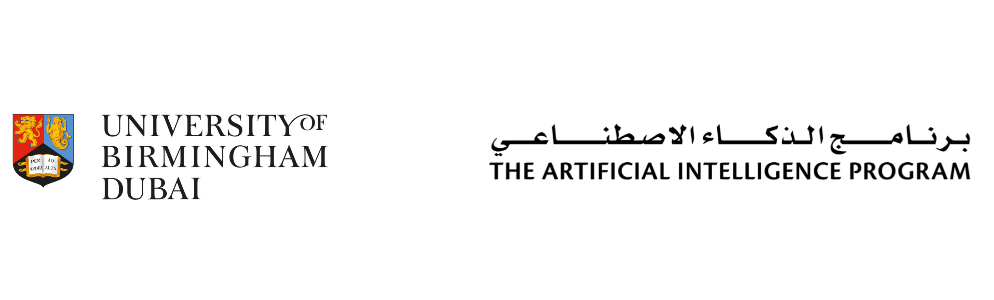

# Perceptrons

n this exercise, we will try out some simple Python code to implement perceptrons (single artificial neurons) and show how we can link them together to form a neural network.

Conceptually, a perceptron is a model that is analagous to a biological neuron. The basic function of a biological neuron is to add up its inputs and to produce an output if the sum is greater than some value, known as the threshold value. The inputs to a neuron arrive alonge dendrites, which are connected to the output of other neurons via specialised junctions called synapses. These junctions alter the effectiveness with which the signal is passed between neurons. Some synapses are good junctions and pass a larger signal than others. The cell body of a neuron receives these input signals and fires if the input exceeds some threshold value.

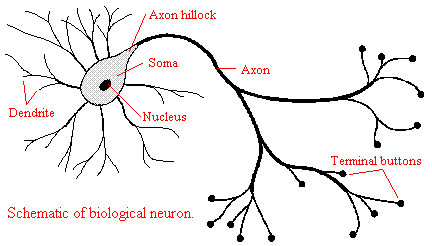

The efficiency of the synapses is modelled by having a multiplicative factor applied to each of the inputs to the neuron, termed a multiplicative weight.

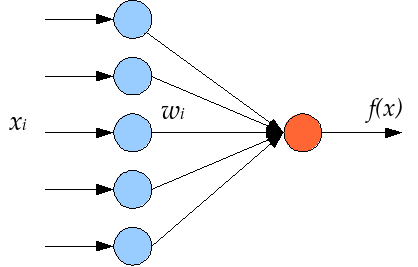

These model neurons were given the name perceptron by Frank Rosenblatt in 1962.

## Step Function

In [61]:
# The step function gives an output of 1 when the input exceeds a certain threshold.
def step_function(x, threshold):
    if x < threshold:
        return 0
    elif x >= threshold:
        return 1

## One-Input Perceptron:

In [ ]:
class Perceptron1():
    """This class implements a 1-input perceptron."""

    def __init__(self, w1, threshold, activation_function):
        self.w1 = w1
        self.threshold = threshold
        self.activation_function = activation_function

    def activate(self, x1):
        output = self.activation_function(x1 * self.w1, self.threshold)
        return output

In [ ]:
w1 = 0.5
threshold = 0.5

p1 = Perceptron1(w1, threshold, step_function)

input1 = 0.75
p1.activate(input1)

0

In [ ]:
p1.w1 = None
p1.threshold = None
test_input = 1
p1.activate(test_input)

## Two-Input Perceptron

In [ ]:
class Perceptron2():
    """This class implements a 2-input perceptron."""

    def __init__(self, w1, w2, threshold, activation_function):
        self.w1 = w1
        self.w2 = w2
        self.threshold = threshold
        self.activation_function = activation_function

    def activate(self, x1, x2):
        output = self.activation_function(sum([x1 * self.w1, x2 * self.w2]), self.threshold)
        return output

In [ ]:
w1 = 0.1
w2 = 0.1
threshold = 0.5
p2 = Perceptron2(w1, w2, threshold, step_function)

input1 = 0
input2 = 1
p2.activate(input1, input2)

0

In [ ]:
p2.w1 = None
p2.w2 = None
p2.threshold = None

input1 = 1
input2 = 1
p2.activate(input1, input2)

## Modeling Specific Tasks Using Perceptrons

### Modelling the "and" logical operator

This is what the "and" truth table looks like.

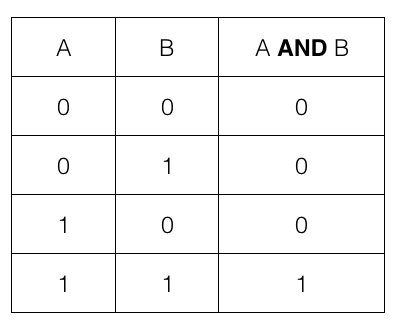

It takes two inputs and returns one output. The output is 1 only when both inputs are 1.

In [ ]:
weight1 = 1
weight2 = 1
threshold = 2

and_perceptron = Perceptron2(weight1, weight2, threshold, step_function)
print("false and false == false", and_perceptron.activate(0, 0))
print("false and true == false", and_perceptron.activate(0, 1))
print("true and false == false", and_perceptron.activate(1, 0))
print("true and true == true", and_perceptron.activate(1, 1))


false and false == false 0
false and true == false 0
true and false == false 0
true and true == true 1


### Modelling the "or" logical operator

This is what the "or" truth table looks like.

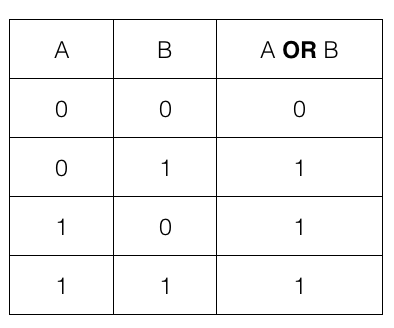

It takes two inputs and returns one output. The output is 1 when either or both of the inputs are 1.

In [ ]:
weight1 = 1
weight2 = 1
threshold = 0.25

or_perceptron = Perceptron2(weight1, weight2, threshold, step_function)
print("false or false == false", or_perceptron.activate(0, 0))
print("false or true == true", or_perceptron.activate(0, 1))
print("true or false == true", or_perceptron.activate(1, 0))
print("true or true == true", or_perceptron.activate(1, 1))

false or false == false 0
false or true == true 1
true or false == true 1
true or true == true 1


### Modelling the "not" logical operator

This is what the "not" truth table looks like

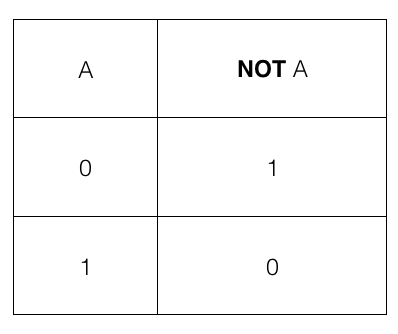

It takes one input. The output is the opposite of the input.

In [ ]:
weight1 = -1
threshold = -0.5

not_perceptron = Perceptron1(weight1, threshold, step_function)
print("not false == true", not_perceptron.activate(0))
print("not true == false", not_perceptron.activate(1))

not false == true 1
not true == false 0


### Modelling the "xor" function

Can you implement the ```xor``` function?

The definition of ```a xor b``` is:

1, if a and b are different
0, if a and b are the same

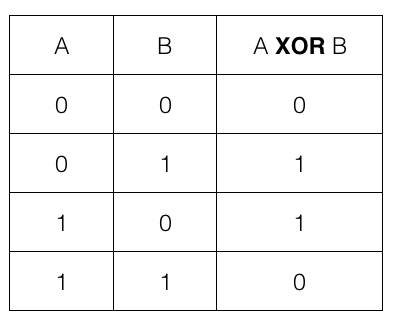

In [ ]:
def xor_net(input1, input2):
    not_input1 = not_perceptron.activate(input1)
    not_input2 = not_perceptron.activate(input2)

    and_output1 = and_perceptron.activate(input1, not_input2)
    and_output2 = and_perceptron.activate(not_input1, input2)

    output = or_perceptron.activate(and_output1, and_output2)

    return output

print("false xor false == false", xor_net(0, 0))
print("false xor true == true", xor_net(0, 1))
print("true xor false == true", xor_net(1, 0))
print("true xor true == false", xor_net(1, 1))

false xor false == false 0
false xor true == true 1
true xor false == true 1
true xor true == false 0


# Introduction to Neural Networks

## Importing Libraries & Functions

In [ ]:
# Import libraries
import numpy as np # NumPy is used for performing fast, efficient numerical operations on collections of data
import pandas as pd # Pandas allows you to create dataframes (tables) to view and manipoulate your data

from sklearn.model_selection import train_test_split # This is a function that divides your data into train, test splits
from sklearn.model_selection import KFold # These functions allow you to perform cross-validation

import matplotlib.pyplot as plt # This is a famous library that enables you to plot graphs and visualizations

## Exploratory Data Analysis

**Customer churn** refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, **the churn label indicates whether a customer has decided to discontinue their subscription or usage of the company's services**. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

You can learn more about the dataset from [here](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data).

### Loading the dataset


Missing Data Summary:


,Feature,Missing Values,Missing %
0,CustomerID,1,0.00
1,Age,1,0.00
2,Gender,1,0.00
3,Tenure,1,0.00
4,Usage Frequency,1,0.00
5,Support Calls,1,0.00
6,Payment Delay,1,0.00
7,Subscription Type,1,0.00
8,Contract Length,1,0.00
9,Total Spend,1,0.00


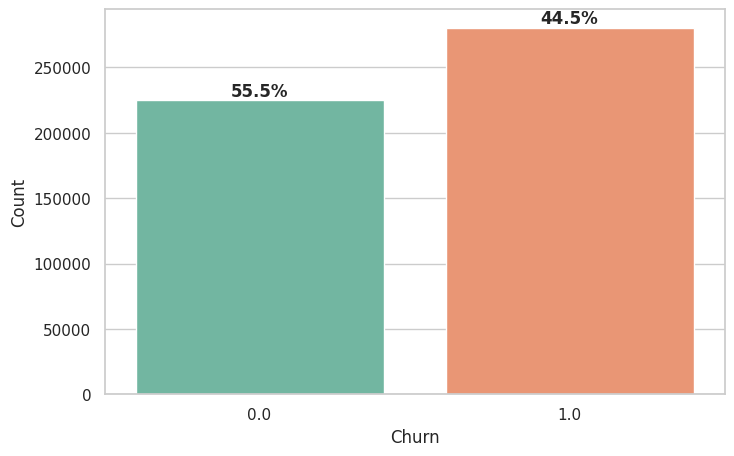

In [ ]:
import seaborn as sns
import warnings
from IPython.display import display

# Turn off warnings
warnings.filterwarnings("ignore")

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# Load datasets
df = pd.read_csv("customer_churn_dataset.csv")

# ---- MISSING DATA ----
missing_df = (
    df.isnull()
    .sum()
    .reset_index()
    .rename(columns={"index": "Feature", 0: "Missing Values"})
)
missing_df["Missing %"] = (missing_df["Missing Values"] / len(df)) * 100
missing_df = missing_df[missing_df["Missing Values"] > 0].sort_values("Missing %", ascending=False)

print("\nMissing Data Summary:")
display(missing_df.style.background_gradient(cmap="Reds").format({"Missing %": "{:.2f}"}))

# ---- CHURN DISTRIBUTION (Train & Test) ----
def plot_churn_distribution(df, dataset_name):
  # Compute counts and percentages
  vc = df["Churn"].value_counts()
  churn_dist = pd.DataFrame({
      "Churn": vc.index,
      "Count": vc.values
  })
  churn_dist["Percent"] = churn_dist["Count"] / churn_dist["Count"].sum() * 100

  # Plot
  plt.figure()
  ax = sns.barplot(data=churn_dist, x="Churn", y="Count", palette="Set2")

  # Add percentage labels at the top of each bar
  for bar, pct in zip(ax.patches, churn_dist["Percent"]):
      height = bar.get_height()
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          height,
          f"{pct:.1f}%",
          ha="center",
          va="bottom",
          fontsize=12,
          fontweight="bold"
      )

# Call for both sets
plot_churn_distribution(df, "Total")

In [62]:
df = pd.read_csv("customer_churn_dataset.csv")
# Randomly sample 60% of the data
df_sampled = df.sample(frac=0.6, random_state=42)

# Save to a new CSV file
df_sampled.to_csv("customer_churn_60_percent_sample.csv", index=False)

### Exploring the Dataset

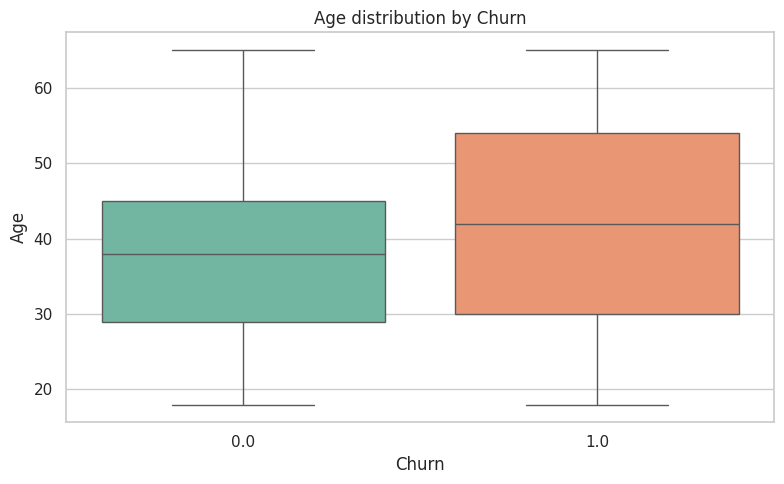

<Figure size 800x500 with 0 Axes>

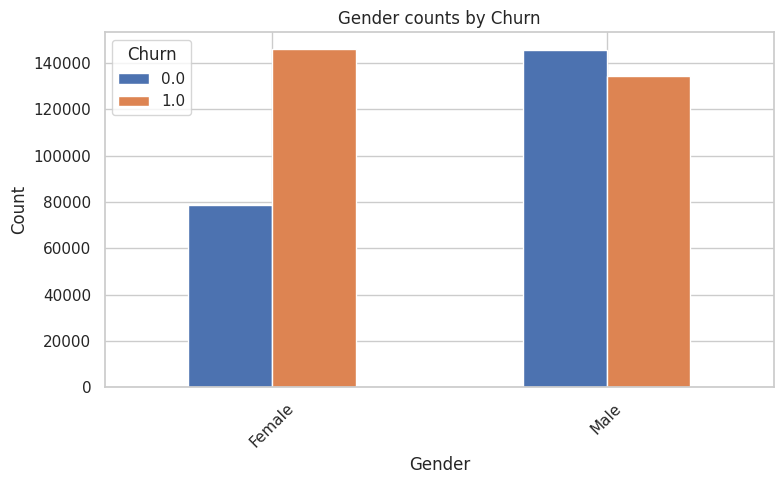

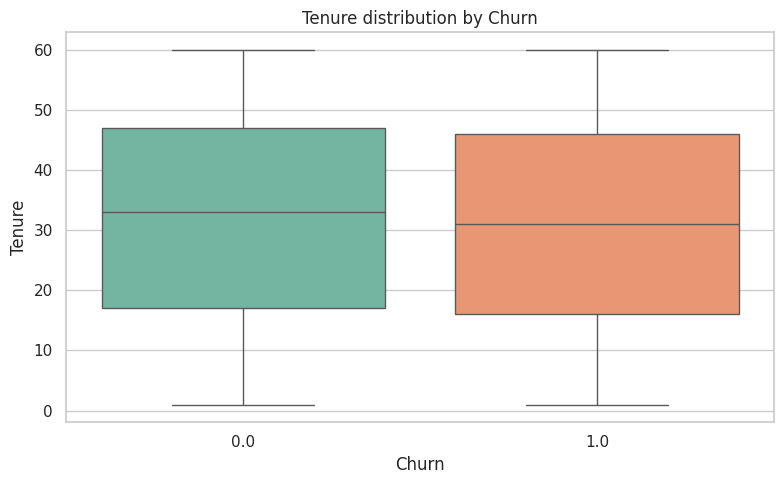

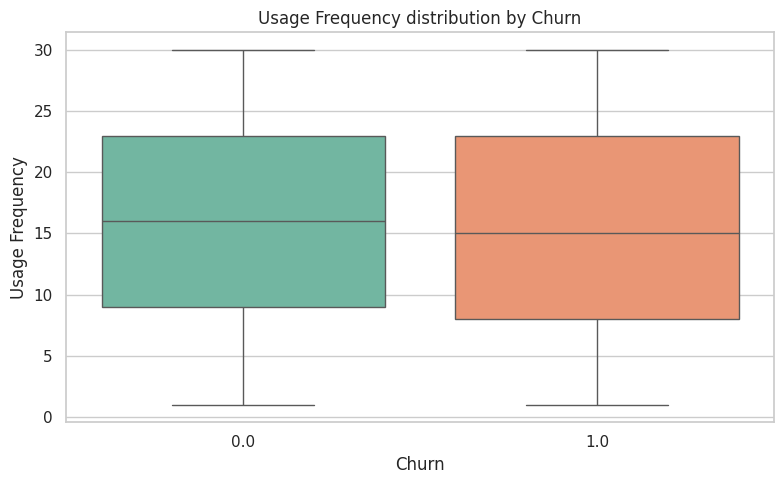

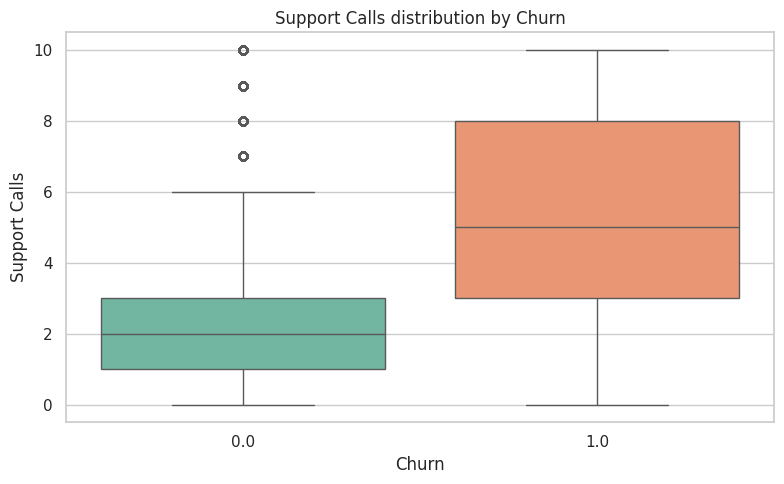

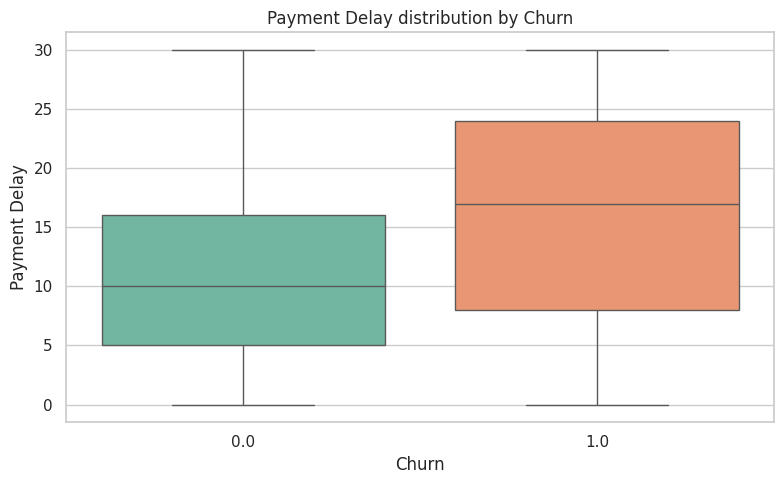

<Figure size 800x500 with 0 Axes>

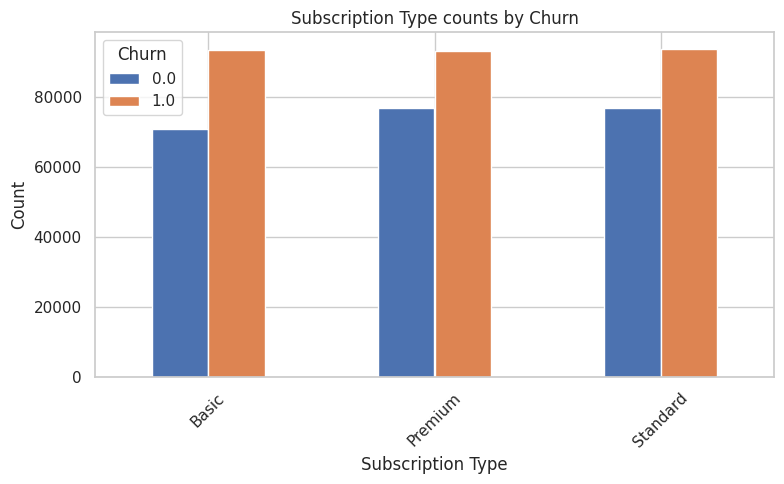

<Figure size 800x500 with 0 Axes>

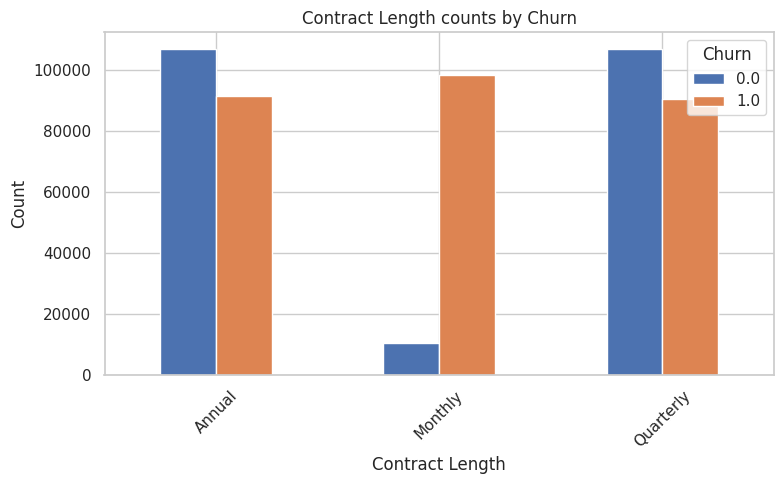

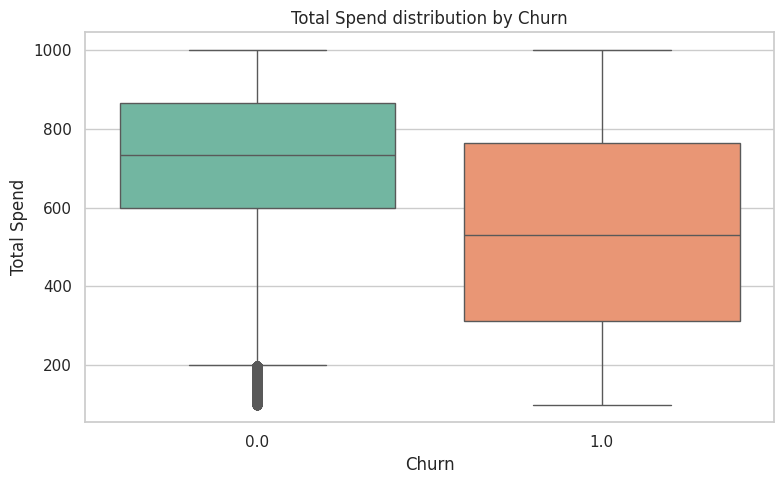

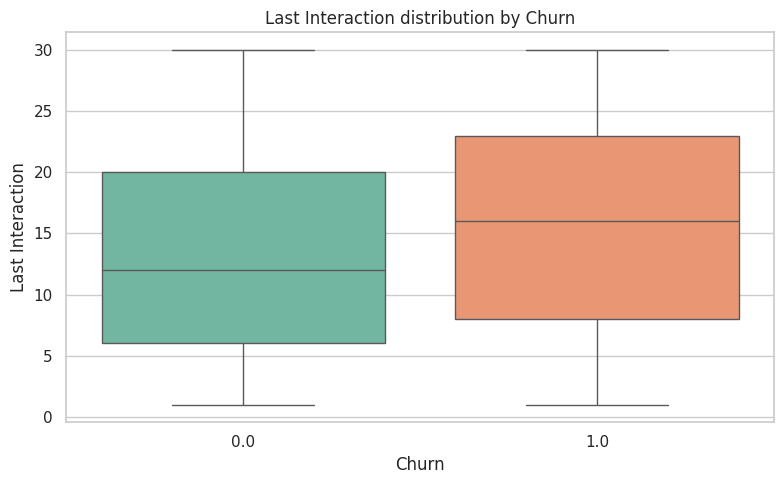

In [ ]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# Drop CustomerID
df_filtered = df.drop(columns=["CustomerID"])

# Identify feature columns (everything except the target)
features = [col for col in df_filtered.columns if col != "Churn"]

# Loop over features and plot each vs. Churn
for feature in features:
    plt.figure()

    # Numeric features → boxplot of feature by Churn
    if pd.api.types.is_numeric_dtype(df_filtered[feature]):
        sns.boxplot(
            x="Churn",
            y=feature,
            data=df_filtered,
            palette="Set2"
        )
        plt.title(f"{feature} distribution by Churn")
        plt.xlabel("Churn")
        plt.ylabel(feature)

    # Categorical features → side-by-side bar chart of counts
    else:
        counts = (
            df_filtered
            .groupby([feature, "Churn"])
            .size()
            .unstack(fill_value=0)
        )
        counts.plot(
            kind="bar",
            rot=45,
            figsize=(8,5)
        )
        plt.title(f"{feature} counts by Churn")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title="Churn")

    plt.tight_layout()
    plt.show()


In [ ]:
import plotly.express as px

# Sample 250, 100 from each class
df_churn_1 = df[df['Churn'] == 1].sample(n=250, random_state=42)
df_churn_0 = df[df['Churn'] == 0].sample(n=100, random_state=42)

# Combine the samples
df_sampled = pd.concat([df_churn_1, df_churn_0], ignore_index=True)

# Create 3D scatter plot
fig = px.scatter_3d(
    df_sampled,
    x='Support Calls',
    y='Total Spend',
    z='Payment Delay',
    color='Churn',
    title='3D Scatter Plot: Support Calls vs Total Spend vs Payment Delay (Sampled)',
    opacity=1
)

fig.update_layout(
    width=900,
    height=700,
    scene=dict(
        xaxis_title='Support Calls',
        yaxis_title='Total Spend',
        zaxis_title='Payment Delay'
    )
)

fig.show()

### Preprocessing Steps

There are currently several issues and preprocessing steps we must undertake before we begin training our neural network:
1. There are some features that may not be predictive
2. There is 1 missing value for each feature we must handle.
3. There are several discrete features we have to preprocess*
4. We have continuous values with a large domain and should be normalized appropriately.


#### Feature Engineering

In [ ]:
# Load datasets
df = pd.read_csv("customer_churn_dataset.csv")

print(df.head())

# -=-=-=-=-=-=-=-=-=-=-=-=-=- STEP 1: Drop CustomerID -=-=-=-=-=-=-=-=-=-=-=-=-=-
df = df.drop(columns=["CustomerID"])

# -=-=-=-=-=-=-=-=-=-=-=-=-=- STEP 2: Dropping Rows with NA (Handling Missing Data) -=-=-=-=-=-=-=-=-=-=-=-=-=-

# Drop any row with at least one NaN
df = df.dropna()

# -=-=-=-=-=-=-=-=-=-=-=-=-=- STEP 3: SPLIT: 80% train, 20% test -=-=-=-=-=-=-=-=-=-=-=-=-=-
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["Churn"], random_state=42)

print(f"Train shape before preprocessing: {train_df.shape}")
print(f"Test shape after preprocessing: {test_df.shape}\n")

# -=-=-=-=-=-=-=-=-=-=-=-=-=- STEP 4: Discretize 'Gender' (One-Hot-Encoding) -=-=-=-=-=-=-=-=-=-=-=-=-=-
# Create dummies for Gender in train and test, ensuring the same columns

# Create dummies
train_gender = pd.get_dummies(train_df['Gender'], prefix='Gender')
test_gender  = pd.get_dummies(test_df['Gender'],  prefix='Gender')

# Figure out all the dummy columns we need
gender_cols = sorted(set(train_gender.columns).union(test_gender.columns))

# Reindex both to that full set, filling missing with 0
train_gender = train_gender.reindex(columns=gender_cols, fill_value=0).astype(int)
test_gender  = test_gender.reindex(columns=gender_cols,  fill_value=0).astype(int)

# Drop the original “Gender” and concat the new dummies
train_df = pd.concat([train_df.drop(columns=['Gender']), train_gender], axis=1)
test_df  = pd.concat([test_df .drop(columns=['Gender']), test_gender ], axis=1)

# -=-=-=-=-=-=-=-=-=-=-=-=-=- STEP 5: Discretize 'Subscription Type' (Ordinal Encoding) -=-=-=-=-=-=-=-=-=-=-=-=-=-

subscription_map = {
    'Basic': 0,
    'Standard': 1,
    'Premium': 2
}

train_df['Subscription Type'] = train_df['Subscription Type'].map(subscription_map)
test_df['Subscription Type']  = test_df['Subscription Type'].map(subscription_map)

# -=-=-=-=-=-=-=-=-=-=-=-=-=- STEP 6: Discretize 'Contract Length' (Ordinal Encoding) -=-=-=-=-=-=-=-=-=-=-=-=-=-

contract_map = {
    'Monthly': 0,
    'Quarterly': 1,
    'Annual': 2
}

train_df['Contract Length'] = train_df['Contract Length'].map(contract_map)
test_df['Contract Length']  = test_df['Contract Length'].map(contract_map)

# -=-=-=-=-=-=-=-=-=-=-=-=-=- STEP 7: Z-Normalize Numeric Features -=-=-=-=-=-=-=-=-=-=-=-=-=-

# List of numerical columns to normalize
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Compute mean and std from training data
train_means = train_df[numeric_cols].mean()
train_stds  = train_df[numeric_cols].std()

# Apply z-normalization
train_df[numeric_cols] = (train_df[numeric_cols] - train_means) / train_stds
test_df[numeric_cols]  = (test_df[numeric_cols]  - train_means) / train_stds

print("-=" * 100)
print(f"Train shape after preprocessing: {train_df.shape}")
print(f"Test shape after preprocessing: {test_df.shape}\n")

print(train_df.head())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

#### Train-Validation-Split

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Separate features and labels
X_train = train_df.drop(columns=['Churn'])  # Adjust if your target column has a different name
y_train = train_df['Churn']
X_test = test_df.drop(columns=['Churn'])  # Adjust if your target column has a different name
y_test = test_df['Churn']

# Create Validation Split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.125, stratify=y_train, random_state=42)

# 70% Train, 10% Validation, 20% Test

## Model

### Evaluate Logistic Regression

,C,val_accuracy,val_auroc
1,0.10,0.836029,0.900158
2,0.50,0.836009,0.900158
4,5.00,0.836009,0.900158
3,1.00,0.836009,0.900158
5,10.00,0.836009,0.900158
0,0.01,0.835949,0.900159



✅ Best C found: 0.1 with Validation Accuracy = 0.8360

🎯 Test Set Performance with C=0.1
Test AUROC: 0.9000

===== Confusion Matrix =====


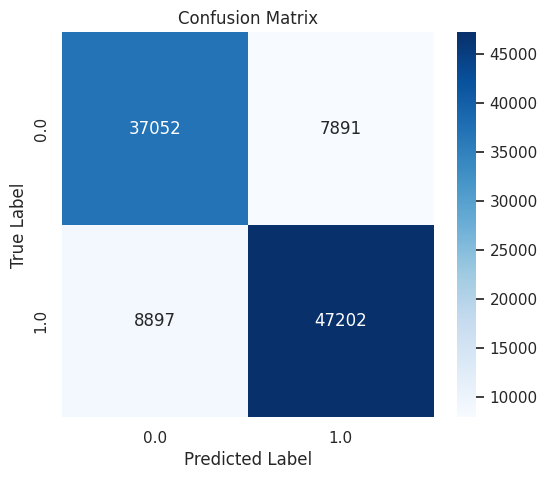


===== Classification Report =====
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82     44943
         1.0       0.86      0.84      0.85     56099

    accuracy                           0.83    101042
   macro avg       0.83      0.83      0.83    101042
weighted avg       0.83      0.83      0.83    101042



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from IPython.display import display
import seaborn as sns

# Range of hyperparameters to iterate over
C_range = [0.01, 0.1, 0.5, 1, 5, 10]

logreg_results = []

for C in C_range:
    logreg_model = LogisticRegression(max_iter=2000, C=C, random_state=42)

    # Train the model
    logreg_model.fit(X_tr, y_tr)

    # Validation predictions
    y_val_pred = logreg_model.predict(X_val)
    y_val_proba = logreg_model.predict_proba(X_val)[:, 1] if len(set(y_tr)) == 2 else None

    # Metrics
    acc = accuracy_score(y_val, y_val_pred)
    auroc = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else None

    logreg_results.append({
        'C': C,
        'val_accuracy': acc,
        'val_auroc': auroc
    })

# Convert to DataFrame and sort
logreg_df = pd.DataFrame(logreg_results)
logreg_df = logreg_df.sort_values(by='val_accuracy', ascending=False)

# Display table
display(logreg_df)

# Select best C
best_C = logreg_df.iloc[0]['C']
print(f"\n✅ Best C found: {best_C} with Validation Accuracy = {logreg_df.iloc[0]['val_accuracy']:.4f}")

# Train final model with best C
final_model = LogisticRegression(max_iter=2000, C=best_C, random_state=42)
final_model.fit(X_tr, y_tr)

# Test performance
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1] if len(set(y_tr)) == 2 else None

test_auroc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

print(f"\n🎯 Test Set Performance with C={best_C}")
if test_auroc is not None:
    print(f"Test AUROC: {test_auroc:.4f}")
print("\n===== Confusion Matrix =====")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = final_model.classes_  # Automatically gets class labels

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n===== Classification Report =====")
print(classification_report(y_test, y_test_pred))


### Multi-Layer Perceptron

Iteration 1, loss = 0.43349415
Validation score: 0.834299
Iteration 2, loss = 0.37941835
Validation score: 0.854273
Iteration 3, loss = 0.35421920
Validation score: 0.863322
Iteration 4, loss = 0.34618073
Validation score: 0.865991
Iteration 5, loss = 0.33968319
Validation score: 0.870606
Iteration 6, loss = 0.33385608
Validation score: 0.874180
Iteration 7, loss = 0.33125154
Validation score: 0.873185
Iteration 8, loss = 0.33001183
Validation score: 0.876080
Iteration 9, loss = 0.32938932
Validation score: 0.875628
Iteration 10, loss = 0.32902336
Validation score: 0.875492
Iteration 11, loss = 0.32879211
Validation score: 0.875583
Iteration 12, loss = 0.32868112
Validation score: 0.876012
Validation score did not improve more than tol=0.000100 for 3 consecutive epochs. Stopping.

===== Test Set Performance =====
Test AUROC: 0.9280

===== Confusion Matrix =====


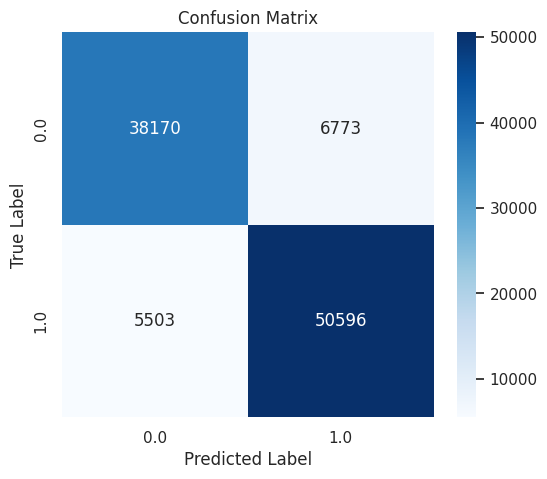


===== Classification Report =====
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     44943
         1.0       0.88      0.90      0.89     56099

    accuracy                           0.88    101042
   macro avg       0.88      0.88      0.88    101042
weighted avg       0.88      0.88      0.88    101042



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# ---------------- Define and Train MLP Model ----------------
model = MLPClassifier(
    hidden_layer_sizes=(5,),
    max_iter=20,
    early_stopping=True,
    n_iter_no_change=3,
    validation_fraction=0.125,
    random_state=42,
    verbose=True
)

# Train the model
model.fit(X_tr, y_tr)

# ---------------- Evaluate on Test Set ----------------
print("\n===== Test Set Performance =====")
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1] if len(set(y_tr)) == 2 else None

test_auroc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

if test_auroc is not None:
    print(f"Test AUROC: {test_auroc:.4f}")
print("\n===== Confusion Matrix =====")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = final_model.classes_  # Automatically gets class labels

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n===== Classification Report =====")
print(classification_report(y_test, y_test_pred))


Training with hls: (8,), lr: 0.1, af: tanh..
Training with hls: (8,), lr: 0.1, af: relu..
Training with hls: (8,), lr: 0.01, af: tanh..
Training with hls: (8,), lr: 0.01, af: relu..
Training with hls: (8,), lr: 0.001, af: tanh..
Training with hls: (8,), lr: 0.001, af: relu..
Training with hls: (8, 8, 5, 5, 3), lr: 0.1, af: tanh..
Training with hls: (8, 8, 5, 5, 3), lr: 0.1, af: relu..
Training with hls: (8, 8, 5, 5, 3), lr: 0.01, af: tanh..
Training with hls: (8, 8, 5, 5, 3), lr: 0.01, af: relu..
Training with hls: (8, 8, 5, 5, 3), lr: 0.001, af: tanh..
Training with hls: (8, 8, 5, 5, 3), lr: 0.001, af: relu..
Training with hls: (8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3), lr: 0.1, af: tanh..
Training with hls: (8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3), lr: 0.1, af: relu..
Training with hls: (8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3), lr: 0.01, af: tanh..
Training with hls: (8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3), lr: 0.01, af: relu..
Training with hls: (8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3), lr: 0.001, af: 

,hidden_layers,learning_rate,activation,val_accuracy,val_auroc
8,"(8, 8, 5, 5, 3)",0.010,tanh,0.933869,0.948743
11,"(8, 8, 5, 5, 3)",0.001,relu,0.933552,0.944187
9,"(8, 8, 5, 5, 3)",0.010,relu,0.932523,0.947256
10,"(8, 8, 5, 5, 3)",0.001,tanh,0.930286,0.946268
14,"(8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3)",0.010,tanh,0.929594,0.945038
16,"(8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3)",0.001,tanh,0.926862,0.944276
7,"(8, 8, 5, 5, 3)",0.100,relu,0.926644,0.930091
0,"(8,)",0.100,tanh,0.911027,0.939938
2,"(8,)",0.010,tanh,0.911007,0.940628
5,"(8,)",0.001,relu,0.901902,0.936040



🎯 Test Set Performance using Best MLP Parameters:
Hidden Layers: (8, 8, 5, 5, 3), Learning Rate: 0.01, Activation: tanh
Test Accuracy: 0.9343
Test AUROC: 0.9483

===== Test Set Confusion Matrix =====


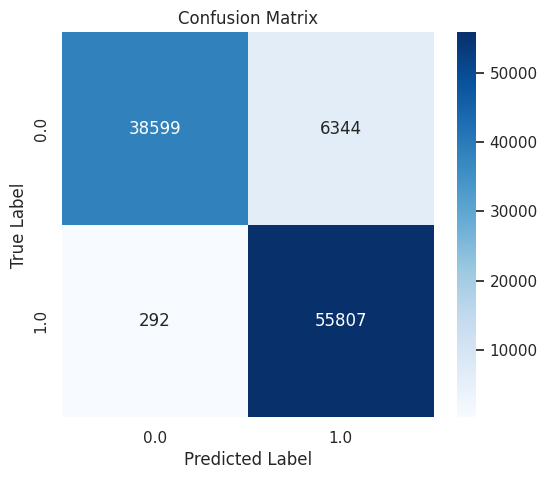


===== Test Set Classification Report =====
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     44943
         1.0       0.90      0.99      0.94     56099

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import itertools
from IPython.display import display

# Define hyperparameter grid
hidden_layer_sizes_range = [
    (8,),
    (8, 8, 5, 5, 3),
    (8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3)
]
learning_rate_range = [0.1, 0.01, 0.001]
activation_function_range = ['tanh', 'relu']

results = []

# Iterate through all hyperparameter combinations
for hls, lr, af in itertools.product(hidden_layer_sizes_range, learning_rate_range, activation_function_range):
  print(f"Training with hls: {hls}, lr: {lr}, af: {af}..")
  model = MLPClassifier(
      hidden_layer_sizes=hls,
      learning_rate_init=lr,
      activation=af,
      max_iter=20,
      early_stopping=True,
      n_iter_no_change=3,
      validation_fraction=0.125,
      random_state=42,
      verbose=False
  )

  model.fit(X_tr, y_tr)

  # Predict on validation set
  y_val_pred = model.predict(X_val)
  y_val_proba = model.predict_proba(X_val)[:, 1] if len(set(y_tr)) == 2 else None

  # Calculate metrics
  acc = accuracy_score(y_val, y_val_pred)
  auroc = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else None

  results.append({
      'hidden_layers': hls,
      'learning_rate': lr,
      'activation': af,
      'val_accuracy': acc,
      'val_auroc': auroc
  })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_accuracy', ascending=False)

# Display top results
display(results_df)

# Select best model
best_params = results_df.iloc[0]
best_hls = best_params['hidden_layers']
best_lr = best_params['learning_rate']
best_af = best_params['activation']

# Train final model on training data with best hyperparameters
final_model = MLPClassifier(
    hidden_layer_sizes=best_hls,
    learning_rate_init=best_lr,
    activation=best_af,
    max_iter=20,
    early_stopping=True,
    n_iter_no_change=3,
    validation_fraction=0.125,
    random_state=42,
    verbose=False
)
final_model.fit(X_tr, y_tr)

# Evaluate on test set
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1] if len(set(y_tr)) == 2 else None

test_acc = accuracy_score(y_test, y_test_pred)
test_auroc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

print(f"\n🎯 Test Set Performance using Best MLP Parameters:")
print(f"Hidden Layers: {best_hls}, Learning Rate: {best_lr}, Activation: {best_af}")
print(f"Test Accuracy: {test_acc:.4f}")
if test_auroc is not None:
    print(f"Test AUROC: {test_auroc:.4f}")
print("\n===== Test Set Confusion Matrix =====")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = final_model.classes_  # Automatically gets class labels

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n===== Test Set Classification Report =====")
print(classification_report(y_test, y_test_pred))



# Resource for Visualizing Neural Networks

Try It Yourself: TensorFlow Playground

To build intuition for how MLPs work, try experimenting with different neural network architectures using this interactive tool:

**👉 [Playground Tensor Flow's Neural Network Visualization](https://playground.tensorflow.org/#activation=relu&batchSize=1&dataset=spiral&regDataset=reg-plane&learningRate=0.01&regularizationRate=0.001&noise=0&networkShape=4,2,2&seed=0.32348&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)**

Start with 1 hidden layer and adjust the neurons, activation functions, and learning rate. You’ll see how the decision boundary adapts and how training accuracy changes based on your settings.
